# Part 3: Model performance
A very common question in every machine learning problem is: how many data samples do we need to model the system behaviour adequately. Unfortunately, just like many other topics in machine learning, there is no straight answer. In many toy problems presented in textbooks, a classification problem is solved with only 50-100 data points. In real world problems, a classification problem may be very difficult even with millions of data points.

## 1.1 Dataset size vs model performance

Quantify the relationship between the dataset size and the model performance.

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib
import matplotlib.pyplot as plt

### 1.1.1 Split the train/test sets with 9:1 ratio. 

In [2]:
monthly_features_outputs = pd.read_excel('monthly_features_outputs.xlsx')

In [3]:
monthly_features_outputs.drop(['Unnamed: 0', 'CLNT_NO', 'ME_DT'], axis = 1, inplace = True)

In [4]:
X_mth = monthly_features_outputs.drop(['response'], axis = 1)
y_mth = monthly_features_outputs['response']

In [5]:
X_train_monthly, X_test_monthly, y_train_monthly, y_test_monthly = train_test_split(X_mth, y_mth, test_size=0.1, random_state=1147)

In [6]:
X_train_monthly.fillna(0, inplace = True)
X_test_monthly.fillna(0, inplace = True)

### 1.1.2 Initialize and create a for loop in which you take N samples (e.g. 50), build a tree model with the N samples and evaluate the test set AUC. Repeat the sampling process 10 times and append the test set AUC. From this table, we can calculate the mean and standard deviation of the test AUC for N samples.

In [7]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 50, random_state = 1146+i)
    X_test_sample = X_test_monthly.sample(n = 50, random_state = 146*i)
    y_train_sample = y_train_monthly.sample(n = 50, random_state = 1146+i)
    y_test_sample = y_test_monthly.sample(n = 50, random_state = 146*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [8]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.469388
2,0.580000
3,0.528409
4,0.516304
5,0.477778
6,0.506645
7,0.644444
8,0.656146
9,0.570652
10,0.406250


In [9]:
mean_50 = round(performance_df['Test AUC'].mean(), 4)
mean_50

0.5356

In [10]:
std_50 = round(performance_df['Test AUC'].std(), 4)
std_50

0.0784

### 1.1.3 Repeat the procedure you performed in the previous step for different sample size N (e.g. 100, 500, 1000, 2000, 5000, 10000).

In [11]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 500, random_state = 1148+i)
    X_test_sample = X_test_monthly.sample(n = 500, random_state = 148*i)
    y_train_sample = y_train_monthly.sample(n = 500, random_state = 1148+i)
    y_test_sample = y_test_monthly.sample(n = 500, random_state = 148*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [12]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.531673
2,0.547844
3,0.619487
4,0.506000
5,0.431132
6,0.629489
7,0.557018
8,0.601164
9,0.517022
10,0.572650


In [13]:
mean_500 = round(performance_df['Test AUC'].mean(), 4)
mean_500

0.5513

In [14]:
std_500 = round(performance_df['Test AUC'].std(), 4)
std_500

0.0594

In [15]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 1000, random_state = 1149+i)
    X_test_sample = X_test_monthly.sample(n = 1000, random_state = 149*i)
    y_train_sample = y_train_monthly.sample(n = 1000, random_state = 1149+i)
    y_test_sample = y_test_monthly.sample(n = 1000, random_state = 149*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [16]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.521742
2,0.607357
3,0.531933
4,0.504730
5,0.604311
6,0.515355
7,0.549978
8,0.548619
9,0.574150
10,0.522230


In [17]:
mean_1000 = round(performance_df['Test AUC'].mean(), 4)
mean_1000

0.548

In [18]:
std_1000 = round(performance_df['Test AUC'].std(), 4)
std_1000

0.0364

In [19]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 2500, random_state = 1150+i)
    X_test_sample = X_test_monthly.sample(n = 2500, random_state = 150*i)
    y_train_sample = y_train_monthly.sample(n = 2500, random_state = 1150+i)
    y_test_sample = y_test_monthly.sample(n = 2500, random_state = 150*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [20]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.607254
2,0.597820
3,0.566937
4,0.590906
5,0.578700
6,0.535339
7,0.623721
8,0.597129
9,0.567232
10,0.614445


In [21]:
mean_2500 = round(performance_df['Test AUC'].mean(), 4)
mean_2500

0.5879

In [22]:
std_2500 = round(performance_df['Test AUC'].std(), 4)
std_2500

0.0264

In [23]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 5000, random_state = 1151+i)
    X_test_sample = X_test_monthly.sample(n = 5000, random_state = 151*i)
    y_train_sample = y_train_monthly.sample(n = 5000, random_state = 1151+i)
    y_test_sample = y_test_monthly.sample(n = 5000, random_state = 151*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [24]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
#performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,AUC_TRAIN,Test AUC
1,0.667811,0.624029
2,0.649168,0.585042
3,0.633624,0.612879
4,0.666720,0.599000
5,0.630119,0.636879
6,0.644055,0.603689
7,0.667950,0.608507
8,0.629913,0.609851
9,0.649168,0.612711
10,0.655885,0.624618


In [25]:
mean_5000 = round(performance_df['Test AUC'].mean(), 4)
mean_5000

0.6117

In [26]:
std_5000 = round(performance_df['Test AUC'].std(), 4)
std_5000

0.0145

In [27]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 10000, random_state = 1152+i)
    X_test_sample = X_test_monthly.sample(n = 10000, random_state = 152*i)
    y_train_sample = y_train_monthly.sample(n = 10000, random_state = 1152+i)
    y_test_sample = y_test_monthly.sample(n = 10000, random_state = 152*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [28]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.610537
2,0.619416
3,0.623628
4,0.615405
5,0.617499
6,0.625573
7,0.600059
8,0.619184
9,0.612909
10,0.599962


In [29]:
mean_10000 = round(performance_df['Test AUC'].mean(), 4)
mean_10000

0.6144

In [30]:
std_10000 = round(performance_df['Test AUC'].std(), 4)
std_10000

0.0088

In [31]:
auc_train           = []
auc_test            = []
iteration = range(10)
for i in iteration:
    # Define and fit
    X_train_sample = X_train_monthly.sample(n = 30000, random_state = 1153+i)
    X_test_sample = X_test_monthly.sample(n = 30000, random_state = 153*i)
    y_train_sample = y_train_monthly.sample(n = 30000, random_state = 1153+i)
    y_test_sample = y_test_monthly.sample(n = 30000, random_state = 153*i)
    estimator = DecisionTreeClassifier(ccp_alpha = 0.004, class_weight='balanced', criterion = 'entropy', max_depth = 4, random_state=1147)
    model_dt = estimator.fit(X_train_sample, y_train_sample)
    # Score train and test set 
    scores_train = estimator.predict_proba(X_train_sample)[:,1] 
    scores_test  = estimator.predict_proba(X_test_sample)[:,1]  
    # Predict the class of test set
    y_test_predicted = estimator.predict(X_test_sample)
    # ROC Calc Train set
    fpr_train, tpr_train, _ = roc_curve(y_train_sample, scores_train)
    # ROC Calc Test set
    fpr_test, tpr_test, _ = roc_curve(y_test_sample, scores_test)
    # Calculate the AUCs
    auc_train.append(auc(fpr_train, tpr_train))
    auc_test.append(auc(fpr_test, tpr_test))

In [32]:
performance_dictionary = {'AUC_TRAIN': auc_train,
                          'Test AUC': auc_test}
performance_df = pd.DataFrame(performance_dictionary)
performance_df.index = range(1, 11)
performance_df.columns.name = 'sample #'
performance_df.drop('AUC_TRAIN', axis = 1, inplace = True)
performance_df

sample #,Test AUC
1,0.620290
2,0.620516
3,0.627488
4,0.620059
5,0.619091
6,0.624063
7,0.604286
8,0.621713
9,0.625755
10,0.611939


In [33]:
mean_30000 = round(performance_df['Test AUC'].mean(), 4)
mean_30000

0.6195

In [34]:
std_30000 = round(performance_df['Test AUC'].std(), 4)
std_30000

0.0068

### 1.1.4 Build a table that contains the values of: Sample size N, Test AUC mean, Test AUC standard deviation.

In [35]:
table = pd.DataFrame(data = {'Sample size N': [50, 500, 1000, 2500, 5000, 10000, 30000],
                             'Test AUC mean': [mean_50, mean_500, mean_1000, mean_2500, mean_5000, mean_10000, mean_30000],
                             'Test AUC standard deviation': [std_50, std_500, std_1000, std_2500, std_5000, std_10000, std_30000],
                            })

In [36]:
table.index = table['Sample size N']
table.drop('Sample size N', axis = 1, inplace = True)
table.index.name = None
table.columns.name = 'Sample size N'
table

Sample size N,Test AUC mean,Test AUC standard deviation
50,0.5356,0.0784
500,0.5513,0.0594
1000,0.5480,0.0364
2500,0.5879,0.0264
5000,0.6117,0.0145
10000,0.6144,0.0088
30000,0.6195,0.0068


### 1.1.5 Using the matplotlib function errorbar, plot the model performance captured in the test AUC mean and standard deviation as a function of the sample size.

Text(0, 0.5, 'Test AUC mean')

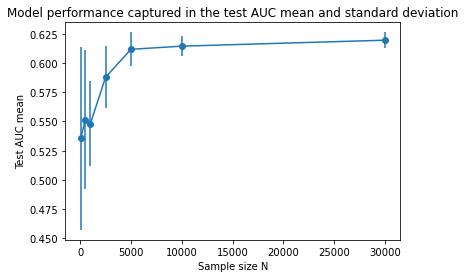

In [37]:
plt.errorbar(x = table.index, y = table['Test AUC mean'], yerr = table['Test AUC standard deviation'], fmt='-o')
plt.title('Model performance captured in the test AUC mean and standard deviation')
plt.xlabel('Sample size N')
plt.ylabel('Test AUC mean')
plt.show()

#### By the plot, we see the increase rate of mean of test AUC starts to decrease after n=5000, so n=5000 is probably the "very sufficient" (i.e. appropoiate) sample size one could use. In terms of the minimum number of samples needed to model the behaviour adequately, in my personal opinion, n=2500 is enough.